In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.fftpack import fft,ifft

In [2]:
body_acc_x = pd.read_csv('../testData/body_acc_x_test.txt', delim_whitespace=True, header=None).to_numpy()
y = pd.read_csv('../testData/y_test.txt', delim_whitespace=True, header=None).to_numpy()
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

In [3]:
def showplot(data, after):
    plt.subplots_adjust(bottom=1, top=4, right=1)
    plt.subplot(311)
    plt.plot(data)
    plt.title('before FFT')
    plt.subplot(312)
    plt.plot(after)
    plt.title('after FFT')
    plt.subplot(313)
    plt.plot(data)
    plt.title('mixed')
    plt.plot(after)
    plt.show()
    
def plot(list):
    plt.plot(list[0])
    plt.plot(list[1])
    plt.plot(list[2])
    plt.plot(list[3])
    plt.plot(list[4])
    plt.show()

index:  978 	y:  6 	Activity:  LAYING 



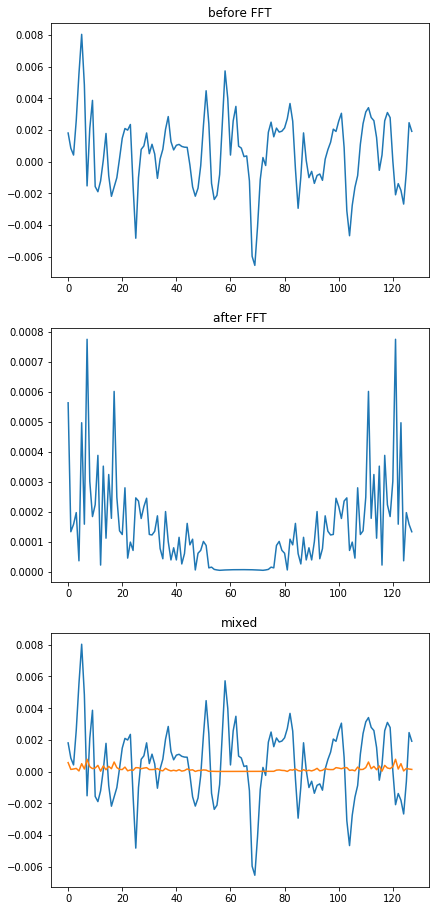

In [4]:
index = random.randint(0,2947)
data = body_acc_x[index]
n = len(data)
print('index: ',index, '\ty: ', y[index][0], '\tActivity: ', ACTIVITIES[y[index][0]-1], '\n')

after = abs(fft(body_acc_x)[index])/n
showplot(data,after)

y:  1 	Activity:  WALKING 



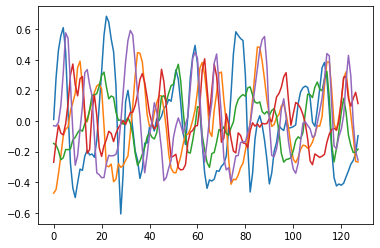

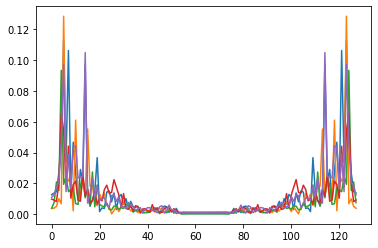

y:  2 	Activity:  WALKING_UPSTAIRS 



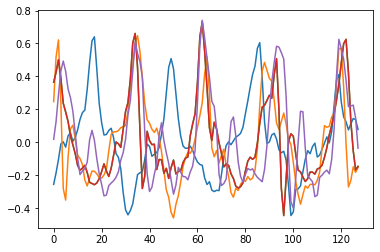

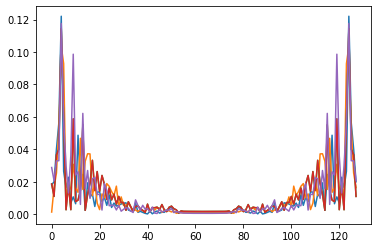

y:  3 	Activity:  WALKING_DOWNSTAIRS 



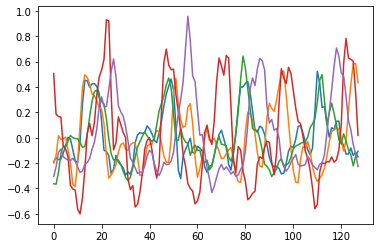

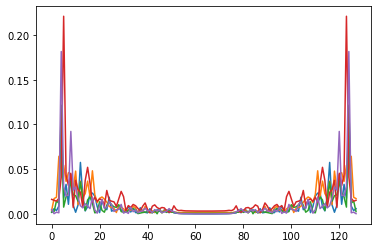

y:  4 	Activity:  SITTING 



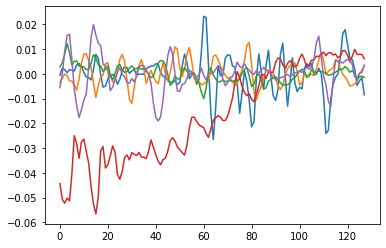

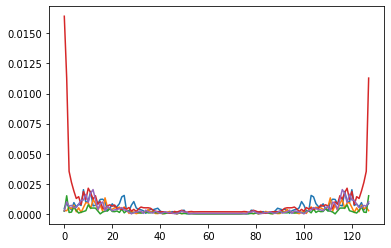

y:  5 	Activity:  STANDING 



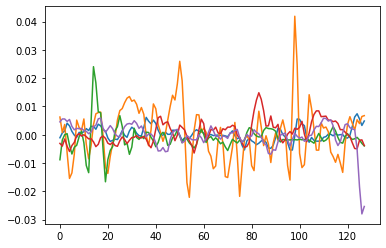

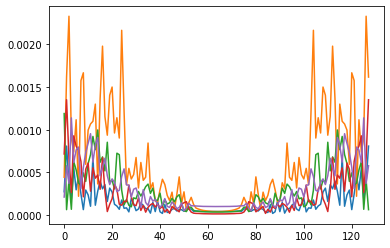

y:  6 	Activity:  LAYING 



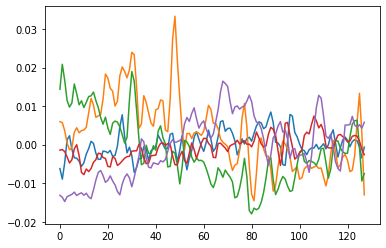

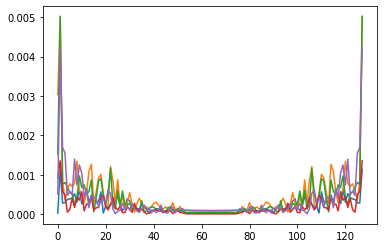

In [5]:
for step in range(6):
    data = []
    after = []
    for sample in range(5):
        index = random.randint(0,2946)
        while (y[index][0]!=step+1):
            index = random.randint(0,2946)
        data.append(body_acc_x[index])
        after.append(abs(fft(body_acc_x)[index])/128)
        
    print('y: ', y[index][0], '\tActivity: ', ACTIVITIES[y[index][0]-1], '\n')
    plot(data)
    plot(after)